# Diffusion eqaution

Consider the diffusion eqaution on the interval $[0,L]\times[0,T]$ with the periodic boundary condiction and $0<\alpha<1$.
$$
\begin{cases}
    _0^CD_t^{\alpha}u(x,t)= u_{xx}, &x\in[0,L],t\in[0,T] \\
    u(0+h,t) = u(L+h,t), &h\in[0,L],t\in[0,T]
\end{cases}
$$

where $$_0^CD_t^{\alpha}u(x,t)=\dfrac{1}{\Gamma{(1-\alpha)}}\int^t_0(t-s)^{-\alpha}\dfrac{\partial}{\partial t}u(x,s)ds$$ is the Caputo Derivative with $0<\alpha<1$.

## L1-Scheme
[Implicit finite difference approximation for time fractional diffusion equations](https://www.sciencedirect.com/science/article/pii/S0898122108001156)

Define $\Delta t=T/N$ to be the uniformly temporal step and $\Delta x=L/M$ to be the uniformly spatal step. The temporal grid point is $t_k=t_0+k\Delta t,k=0,1,2,\dots,N$ and spatal grid point is $x_k=x_0+k\Delta x,k=0,1,2,\dots,M$ where $t_0$ and $x_0$ are $0$. Denote $u^i_j$  to be the approximation of $u(x_j,t_i)$.

The fractional operator $_0^CD_t^{\alpha}u(x_i,t_n)$ can be approximated by $$_0^CD_t^{\alpha}u(x_i,t_n)\approx \dfrac{1}{\Gamma{(1-\alpha)}}\sum^{n}_{k=1} \int^{t_{k}}_{t_{k-1}} (t_n-s)^{-\alpha} \left(\dfrac{u(x_i,t_{k})-u(x_i,t_{k-1})}{\Delta t}\right)ds$$ where $\dfrac{u(x_i,t_{k})-u(x_i,t_{k-1})}{\Delta t}$ is approximation of $\dfrac{\partial}{\partial t}u(x_i,t_{k})$.

Therefore, the L1-scheme can be obtained
$$
\begin{align}
    _0^CD_t^{\alpha}u(x_i,t_n)
    &\approx \dfrac{1}{\Gamma{(1-\alpha)}} \sum^n_{k=1} \int^{t_{k}}_{t_{k-1}} (t_n-s)^{-\alpha} \left(\dfrac{u^{k}_i-u^{k-1}_i}{\Delta t}\right)ds \\
    & = \dfrac{1}{\Gamma{(1-\alpha)}} \sum^n_{k=1} \dfrac{-1}{1-\alpha} (t_n-s)^{1-\alpha} \Big|^{t_{k}}_{t_{k-1}} \left(\dfrac{u^{k}_i-u^{k-1}_i}{\Delta t}\right) \\
    & = \dfrac{1}{(1-\alpha)\Gamma{(1-\alpha)}} \sum^n_{k=1} \left[(t_n-t_{k-1})^{1-\alpha}-(t_n-t_{k})^{1-\alpha}\right] \left(\dfrac{u^{k}_i-u^{k-1}_i}{\Delta t}\right) \\
    & = \dfrac{1}{\Gamma{(2-\alpha)}} \sum^n_{k=1} \left[((n-k+1)\Delta t)^{1-\alpha}-((n-k)\Delta t)^{1-\alpha}\right] \left(\dfrac{u^{k}_i-u^{k-1}_i}{\Delta t}\right) \\
    & = \dfrac{\Delta t^{-\alpha}}{\Gamma{(2-\alpha)}} \sum^n_{k=1} \left[(n-k+1)^{1-\alpha}-(n-k)^{1-\alpha}\right] \left(\dfrac{u^{k}_i-u^{k-1}_i}{\Delta t}\right)
\end{align}
$$ shifting indices,
$$
\begin{align}
    _0^CD_t^{\alpha}u(x_i,t_n)
    &\approx \dfrac{\Delta t^{-\alpha}}{\Gamma{(2-\alpha)}} \sum^n_{j=1} \left[(j)^{1-\alpha}-(j-1)^{1-\alpha}\right] \left(u^{n-j+1}_i-u^{n-j}_i\right) \\
    & = \dfrac{\Delta t^{-\alpha}}{\Gamma{(2-\alpha)}} \sum^n_{j=1} \omega^{(\alpha)}_{j} \left(u^{n-j+1}_i-u^{n-j}_i\right),0<\alpha<1
\end{align}
$$, where $\omega_j^{(\alpha)} = [j^{1-\alpha}-(j-1)^{1-\alpha}]$


|$\omega_j^{(\alpha)}$ | $\alpha=0.3$ | $\alpha=0.5$ | $\alpha=0.7$ |
|------|:------:|:------:|:------:|
|$j=1$ | 1.0 | 1.0 | 1.0 |
|$j=2$ | 0.8660659830736148 | 0.41421356237309515 | 0.07177346253629313 |
|$j=3$ | 0.8218093964486717 | 0.31783724519578205 | 0.044349711497611244 |

## Full-scheme

Approximate spatal domain by central difference, then we have the full scheme of diffusion equation $$\dfrac{\Delta t^{-\alpha}}{\Gamma{(2-\alpha)}} \sum^n_{j=1} \omega^{(\alpha)}_j \left(u^{n-j+1}_i-u^{n-j}_i\right) = \dfrac{u^{n}_{i-1} -2u^{n}_i + u^{n}_{i+1}}{\Delta x^2} \text{, for } i=0,1,\dots,M-1$$

$$\dfrac{\Delta t^{-\alpha}}{\Gamma{(2-\alpha)}} \left(\omega^{(\alpha)}_1\left(u^{n}_i-u^{n-1}_i\right) + \sum^n_{j=2} \omega^{(\alpha)}_j \left(u^{n-j+1}_i-u^{n-j}_i\right) \right)= \dfrac{u^n_{i-1} -2u^n_i + u^n_{i+1}}{\Delta x^2}$$

$$\left(u^{n}_i-u^{n-1}_i\right) + \sum^n_{j=2} \omega^{(\alpha)}_j \left(u^{n-j+1}_i-u^{n-j}_i\right) = \dfrac{\Delta t^{\alpha}}{\Delta x^2}\Gamma{(2-\alpha)} \left(u^n_{i-1} -2u^n_i + u^n_{i+1}\right)$$

For $n=1$, $$u^1_i-u^0_i=\dfrac{\Delta t^{\alpha}}{\Delta x^2}\Gamma{(2-\alpha)} \left(u^1_{i-1} -2u^1_i + u^1_{i+1}\right)$$
$$u^0_i=-ku^1_{i-1}+ (1+2k)u^1_i -ku^1_{i+1}$$, where $k=\dfrac{\Delta t^{\alpha}}{\Delta x^2}\Gamma{(2-\alpha)}$.

and for $n\geq2$, $$-ku^{n}_{i-1}+ (1+2k)u^{n}_i -ku^{n}_{i+1}=u^{n-1}_i-\sum^n_{j=2} \omega^{(\alpha)}_j \left(u^{n-j+1}_i-u^{n-j}_i\right)$$

Let $U^n$ be the vector form of the $u^n_i$ for $i=0,1,\dots,M$ as following 
$$ U^n =
\begin{bmatrix}
    u^n_0 \\
    u^n_1 \\
    \vdots \\
    u^n_{m-1} \\
    u^n_{m}
\end{bmatrix}
$$

with the periodic boundary condition $u(0+\Delta x,t)=u(L+\Delta x,t)$. Let 
$$ K =
\begin{bmatrix}
    1+2k & -k & 0 & \dots & 0 & -k & 0 \\
    -k & 1+2k & -k & 0 & \dots & 0 & 0 \\
    0 & -k & 1+2k & -k & 0 & \dots & 0 \\
    \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots\\ 
    0 & \dots & 0 & -k & 1+2k & -k & 0 \\
    0 & 0 & \dots & 0 & -k & 1+2k & -k\\ 
    0 & -k & 0 &  \dots & 0 & -k & 1+2k
\end{bmatrix}
$$

hence, $$U^{n}=K^{-1} \left(U^{n-1} - \sum^n_{j=2} \omega^{(\alpha)}_j \left(U^{n-j+1}-U^{n-j}\right)\right), \text{for } n\geq 2$$ and 
$$U^1 = K^{-1}U^0$$

## Mass
[DETAILED ANALYSIS OF A CONSERVATIVE DIFFERENCE
APPROXIMATION FOR THE TIME FRACTIONAL
DIFFUSION EQUATION]()

stable when $\dfrac{(\Delta t)^{\alpha}}{(\Delta x)^2} \leq \dfrac{1-2^{-\alpha}}{\Gamma{(2-\alpha)}}$

In [2]:
import operator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.special import gamma, binom
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.linalg import fractional_matrix_power
from tqdm import tqdm
from scipy.optimize import fsolve


def compute_classical_energy(u, epsilon, dx):
    ux = np.gradient(u)/dx
    term1 = np.sum((epsilon**2 / 2.0) * (ux**2))
    term2 = np.sum(((1 - u ** 2) ** 2) / 4)
    return dx * (term1 + term2)

def variationalEnergy(history_arr = None, classicalEnergy = None, current = None, alpha = None, t_step = None):
    if alpha != 1:
        for j in range(1,current):
            h_d = history_arr[:,j]-history_arr[:,j-1]
            q = q_array(terminate = j, a = alpha, dt = t_step)
            for k in range(0,j):

                classicalEnergy -= 1/2*h_step**2*q[k]*np.sum((h_d-(history_arr[:,j-k]-history_arr[:,j-k-1]))**2/(t_step**2))
        return classicalEnergy
    else:
        return classicalEnergy


def set_CaputoL1_coefficient(terminate_point, dt, alpha):
    # index start j=1
    coeffi = [(j)**(1-alpha) - (j-1)**(1-alpha) for j in range(1, terminate_point+1)]
    return np.array(coeffi)/(dt**alpha * gamma(2-alpha))

def set_GL_coefficient(terminate_point, dt, alpha):
    coeffi = [(-1)**(j) * binom(alpha, j) for j in range(0, terminate_point+1)]
    return np.array(coeffi)/dt**alpha

def set_Laplacian1D(nx, mesh_size):
    # central differece
    diagonals = [np.ones(nx-1), -2*np.ones(nx-1), np.ones(nx-1)]
    offsets = [-1, 0, 1]
    L = diags(diagonals, offsets, shape=(nx-1, nx-1), format='csr')
    L[0,-1] = L[-1,0] = 1
    return L / mesh_size**2

def set_backward1D(nx):
    diagonals = [np.ones(nx-1), -np.ones(nx-1)]
    offsets = [0, -1]
    B = diags(diagonals, offsets, shape=(nx-1, nx-1), format='csr')
    return B


In [7]:
a = set_backward1D(5)
print(fractional_matrix_power(a.toarray(),1/2))

[[ 1.      0.      0.      0.    ]
 [-0.5     1.      0.      0.    ]
 [-0.125  -0.5     1.      0.    ]
 [-0.0625 -0.125  -0.5     1.    ]]


In [2]:
set_GL_coefficient(10,1,0.5)

array([ 1.        , -0.5       , -0.125     , -0.0625    , -0.0390625 ,
       -0.02734375, -0.02050781, -0.01611328, -0.01309204, -0.01091003,
       -0.00927353])

In [15]:
alpha_list = [0.1, 0.3, 0.5, 0.7, 0.9, 0.99, 0.9999]

# 定義常數
eps = 0.1

np.random.seed(521)

# 定義計算域大小及網格數量
L = 10
Nx = 2**8
x = np.linspace(-L/2, L/2, Nx)
x = x[:-1]
# u = 0.5*np.tanh(1-abs(x))
u = 0.05*(2*np.random.rand(Nx-1)-1)
# u = 1/4 * np.cos(2*x) + 1/2
# u = np.ones((Nx-1,))
# u = np.cos(x)
# u = 2*np.random.rand(Nx-1)-1
# u = np.ones(Nx-1)
# u[7:15] = u[20:35] = 0
# u0 = u + np.random.rand(Nx-1)
u0 =u
m0 = np.sum(u)

# 計算網格間距
dx = L / (Nx - 1)
dt = 1e-2
iter_max = 500

# q = set_CaputoL1_coefficient(iter_max, dt, alpha)
Lap = set_Laplacian1D(Nx, dx)
I = diags(np.ones(Nx-1), shape=(Nx-1, Nx-1))

L1_historyArray = u
CQ_historyArray = u

L1_data_dict = {
}
CQ_data_dict = {
}

for alpha in alpha_list:
    L1coef = set_CaputoL1_coefficient(iter_max, dt, alpha)
    CQcoef = set_GL_coefficient(iter_max, dt, alpha)
    
    L1H = I - eps**2/L1coef[0] * Lap
    CQH = I - eps**2/CQcoef[0] * Lap
    
    L1_historyArray = u0
    CQ_historyArray = u0
    
    for i in range(iter_max):
        if i == 0 :
            b = u0
            L1_u = spsolve(L1H, b)
            CQ_u = spsolve(CQH, b)

        else:
            L1_nonlocalDiff = np.flipud(np.diff(L1_historyArray, axis=0))
            CQ_nonlocalDiff = np.flipud(CQ_historyArray[1:]) - CQ_historyArray[0]
            
            L1_b = -L1coef[1:i+1].dot(L1_nonlocalDiff)/L1coef[0] + L1_historyArray[-1]
            CQ_b = -CQcoef[1:i+1].dot(CQ_nonlocalDiff)/CQcoef[0] + CQ_historyArray[0]
        
            L1_u = spsolve(L1H, L1_b)
            CQ_u = spsolve(CQH, CQ_b)
        
        L1_historyArray = np.vstack([L1_historyArray, L1_u])
        CQ_historyArray = np.vstack([CQ_historyArray, CQ_u])
    
    L1_data_dict[alpha] = L1_historyArray
    CQ_data_dict[alpha] = CQ_historyArray
    

In [257]:
u = 0.05*(2*np.random.rand(1000)-1)
u.mean()

0.0005856339793775375

In [24]:
sum(L1_data_dict[0.9][-1])

21.9797317668416

In [25]:
sum(CQ_data_dict[0.9][-1])

21.97973176684129

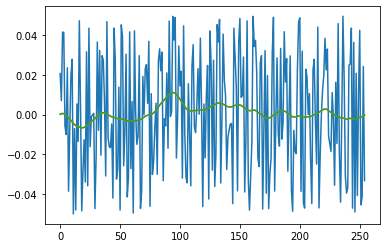

In [272]:
plt.plot(L1_data_dict[0.9][0])
plt.plot(L1_data_dict[0.9][-1])
plt.plot(CQ_data_dict[0.9][-1])

In [233]:
print("exact, m0, ", m0)
print("alpha=0.5, m_N, ", np.sum(data_dict[0.5][1]-data_dict[0.5][0]))

exact, m0,  -97.99893324371277
alpha=0.5, m_N,  -1.6415688253168526e-14


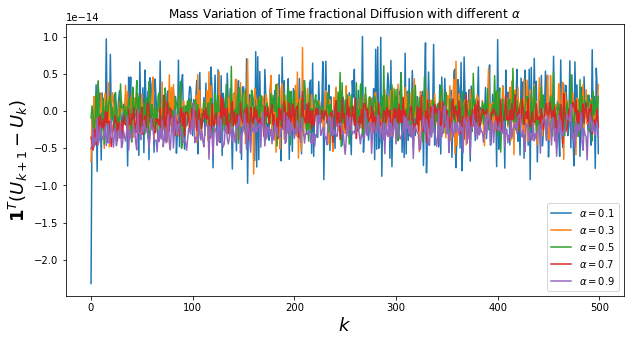

In [5]:
# mass variation of L1 scheme
plt.figure(figsize=(10,5))
for alpha, u_historyArray in L1_data_dict.items():
    massDiff_list = [np.sum(du) for du in np.diff(u_historyArray, axis=0)]
#     print(f"{alpha}, u1-u0: {massDiff_list[0]}")
#     print(f"{alpha}, u2-u1: {massDiff_list[1]}")
#     print(f"{alpha}, u3-u2: {massDiff_list[2]}")
#     print(f"{alpha}, u4-u3: {massDiff_list[3]}")
#     print("\n")
    plt.plot(massDiff_list)
    plt.plot()

plt.legend([r"$\alpha=0.1$", r"$\alpha=0.3$", r"$\alpha=0.5$", r"$\alpha=0.7$", r"$\alpha=0.9$"])
plt.title(r"Mass Variation of Time fractional Diffusion with different $\alpha$", fontsize=12)
plt.xlabel(r"$k$", fontsize=18)
plt.ylabel(r"$\mathbf{1}^T(U_{k+1}-U_{k})$", fontsize=18)
# plt.ylim(-3*1e-16,3*1e-16)
plt.show()

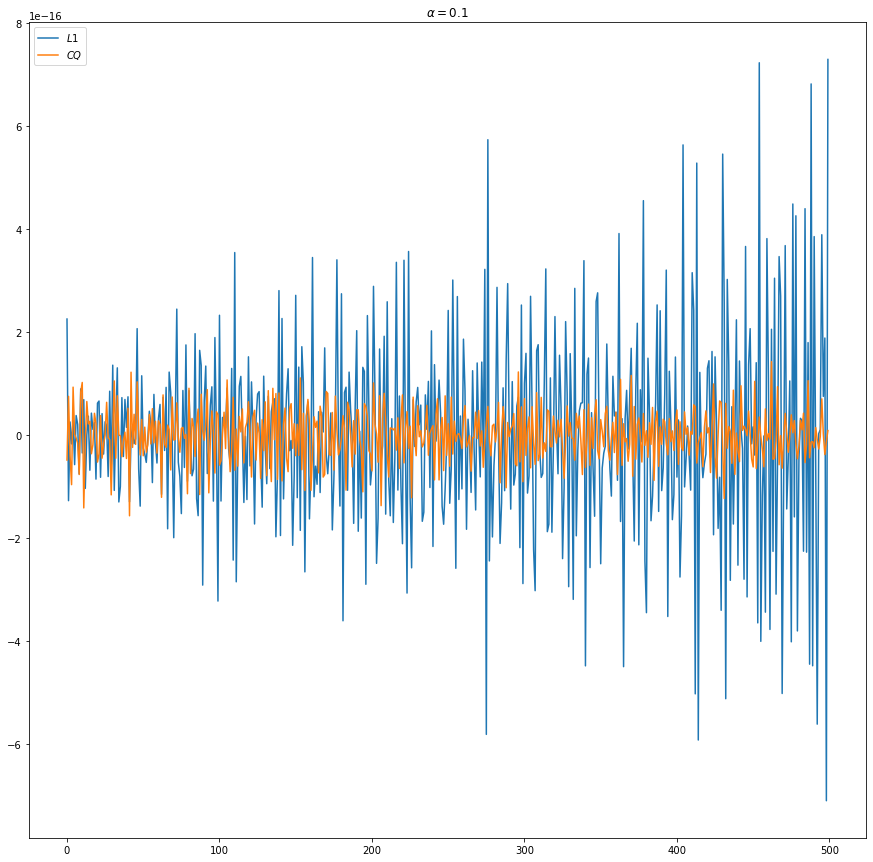

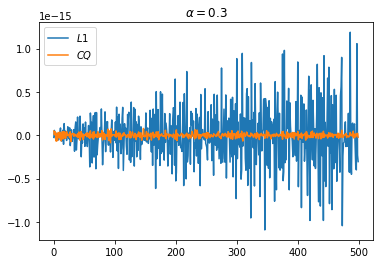

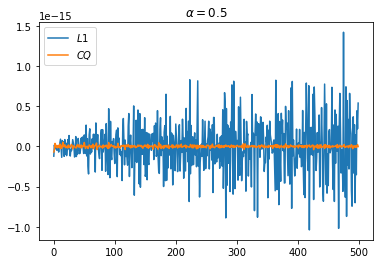

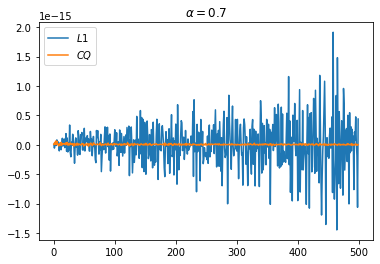

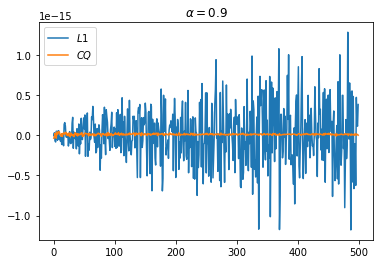

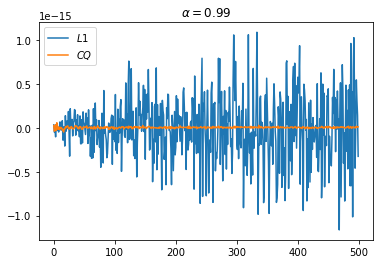

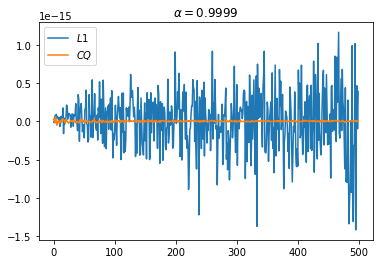

In [16]:
# mass variation of L1 scheme
fig = plt.figure(figsize=(15,15))
# gs = gridspec.GridSpec(3, 3)
# gs_idx = [(0,0), (1,0), (2,0), (0,1), (1,1), (2,1)]
i = 0
for alpha in alpha_list:
    L1massDiff_list = [np.sum(du) for du in np.diff(L1_data_dict[alpha], axis=0)]
    CQmassDiff_list = [np.sum(du) for du in np.diff(CQ_data_dict[alpha], axis=0)]
#     ax = plt.subplot(gs[gs_idx[i]])
#     ax.plot(CQmassDiff_list)
    plt.plot(CQmassDiff_list)
    plt.plot(L1massDiff_list)
    plt.legend([r"$L1$",r"$CQ$"])
    plt.title(rf"$\alpha={alpha}$", fontsize=12)
    plt.show()
    i = i + 1
#     ax[i,0].xlabel(r"$k$", fontsize=18)
#     ax[i,0].ylabel(r"Total Mass of $u^{k+1}-u^k$", fontsize=18)
#     plt.ylim(-3*1e-15,3*1e-15)
fig.suptitle(r"Mass variation with L1 and CQ in different $\alpha$", y=0.93, fontsize= 18)
fig.supxlabel(r'$k$', y=0.07, fontsize= 18)
fig.supylabel(r"Total Mass of $U_{k+1}-U_k$", fontsize= 18, x=0.08)
plt.show()

In [113]:
massDiff_list = [np.sum(a) for a in np.diff(data_dict[0.5])]
np.abs(massDiff_list)
# mass_list = [np.sum(a) for a in data_dict[0.5]]
# mass_list

array([0.01881876, 0.00096727, 0.00707098, ..., 0.00028469, 0.00028455,
       0.00028441])

In [77]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

x1 = np.arange(11)
y1 = massDiff_list[10]

x2 = np.arange(51, 71)
y2 = massDiff_list[50:70]

x3 = np.arange(71,86)
y3 = massDiff_list[70:85]

def func(x, a, b):
    y = a*x + b
    return y

alpha1 = optimize.curve_fit(func, xdata = x1, ydata = y1)[0]

alpha2 = optimize.curve_fit(func, xdata = x2, ydata = y2)[0]

alpha3 = optimize.curve_fit(func, xdata = x3, ydata = y3)[0]


C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [79]:
alpha3

array([ 5.49930897e-05, -1.29623560e-02])

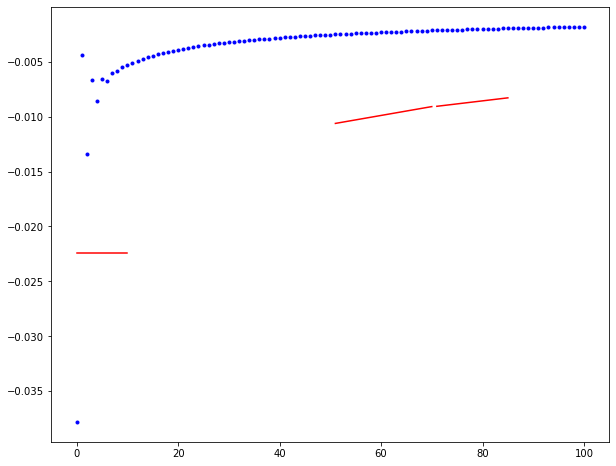

In [90]:
plt.figure(figsize = (10,8))
plt.plot(massDiff_list, 'b.')
plt.plot(x1, alpha1[0]*x1 + alpha1[1], 'r')
plt.plot(x2, alpha2[0]*x2 + alpha2[1], 'r')
plt.plot(x3, alpha3[0]*x3 + alpha3[1], 'r')

In [ ]:
difference_list = []
for i in range(len(u_list)-1):
    v = ((3*dt+1)/dt) * u_list[i] - u_list[i]**3
    difference_list.append((dt/(2*dt+1)) *np.sum(v)-np.sum(u_list[i]))

In [10]:
def power_exact(x, p, alpha):
    y = gamma(1+p)/gamma(1+p-alpha) * x**(p-alpha)
    return y

In [14]:
alpha = 0.7
p = 5
nList = [7, 8, 9, 10]

for n in nList:
    nx = 2**n
    dx = 1 / nx
    x = np.linspace(0, 1, nx)
    exact_y = power_exact(x, p, alpha)
    y0 = np.zeros(nx)

    CaputoL1_coefficient = set_CaputoL1_coefficient(nx, dx, alpha)
    print(CaputoL1_coefficient)
    historyArray_y = np.array([y0])
    

    for i in range(nx):
        
        if i == 0:
            continue
        else:
            nonlocal_Diff_y = np.flipud(np.diff(historyArray_y, axis=0))
            print(nonlocal_Diff_y)
            nonlocal_y = CaputoL1_coefficient[1:i+1].dot(nonlocal_Diff_y)
            historyArray_y = np.vstack([history_y, result])
            print(f"{k}-th: {history_y[-1]}")

errors = []
print(np.linalg.norm(L1_y-exact_y,2)/np.sqrt(nx))

[33.26800067  7.6897125   5.29775468  4.1693919   3.49114499  3.03115609
  2.69537684  2.4377467   2.23281719  2.06528647  1.92535555  1.80643533
  1.70391863  1.61447951  1.53565205  1.46556618  1.40277598  1.34614443
  1.2947642   1.24790169  1.20495688  1.16543385  1.12891888  1.09506388
  1.06357367  1.03419623  1.00671494  0.98094249  0.95671607  0.93389337
  0.91234946  0.89197416  0.87266989  0.85434992  0.83693684  0.82036136
  0.80456126  0.78948046  0.7750683   0.7612789   0.74807057  0.73540536
  0.72324864  0.71156873  0.7003366   0.68952558  0.67911113  0.66907064
  0.65938322  0.65002956  0.64099174  0.63225317  0.6237984   0.61561307
  0.60768379  0.59999808  0.59254425  0.58531139  0.57828928  0.57146832
  0.56483952  0.55839442  0.55212506  0.54602395  0.54008403  0.53429864
  0.52866149  0.52316664  0.51780846  0.51258165  0.50748114  0.50250217
  0.49764019  0.49289091  0.48825022  0.48371423  0.47927925  0.47494175
  0.47069837  0.4665459   0.46248129  0.45850162  0

ValueError: shapes (1,) and (0,128) not aligned: 1 (dim 0) != 0 (dim 0)

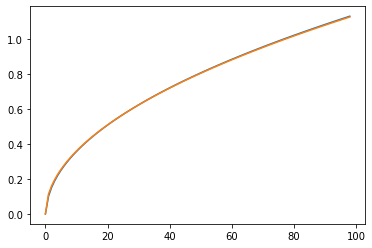

In [11]:
B = set_backward1D(100).toarray()
fm = fractional_matrix_power(B, 0.5)
x = np.linspace(0,1,99)
y = fm.dot(x)
# print(fm)
# GL_y = np.matmul(fm, x) * mesh_size**-alpha
# GL_y
plt.plot(y/(1/99)**0.5)
plt.plot(power_exact(x, 1, 0.5))

In [13]:
power_exact(x, 1, alpha)

array([0.        , 0.26051852, 0.32073592, 0.36222213, 0.39487224,
       0.42221106, 0.44594775, 0.46705499, 0.48614475, 0.50362973,
       0.51980279, 0.53488007, 0.54902609, 0.56236931, 0.57501214,
       0.58703769, 0.5985144 , 0.6094994 , 0.62004093, 0.6301801 ,
       0.6399523 , 0.6493882 , 0.6585146 , 0.66735506, 0.6759304 ,
       0.68425914, 0.69235783, 0.70024132, 0.70792299, 0.71541494,
       0.72272817, 0.72987269, 0.73685766, 0.74369145, 0.75038178,
       0.75693575, 0.76335993, 0.76966037, 0.77584271, 0.7819122 ,
       0.7878737 , 0.79373177, 0.79949066, 0.80515435, 0.81072658,
       0.81621084, 0.82161045, 0.82692851, 0.83216794, 0.8373315 ,
       0.84242182, 0.84744137, 0.85239248, 0.85727739, 0.86209819,
       0.86685691, 0.87155543, 0.87619559, 0.88077911, 0.88530764,
       0.88978275, 0.89420595, 0.89857869, 0.90290233, 0.90717819,
       0.91140753, 0.91559157, 0.91973147, 0.92382834, 0.92788325,
       0.93189723, 0.93587126, 0.93980631, 0.94370328, 0.94756

In [17]:
exact_y = x**(1-alpha)/gamma(2-alpha)
exact_y

array([0.        , 0.39771431, 0.48964375, 0.55297767, 0.60282216,
       0.64455832, 0.68079536, 0.71301822, 0.74216114, 0.76885416,
       0.79354437, 0.81656173, 0.83815741, 0.85852752, 0.8778284 ,
       0.8961869 , 0.91370754, 0.93047753, 0.9465705 , 0.96204923,
       0.97696772, 0.99137281, 1.00530541, 1.01880148, 1.03189281,
       1.04460769, 1.05697136, 1.0690065 , 1.08073353, 1.09217093,
       1.1033355 , 1.11424251])

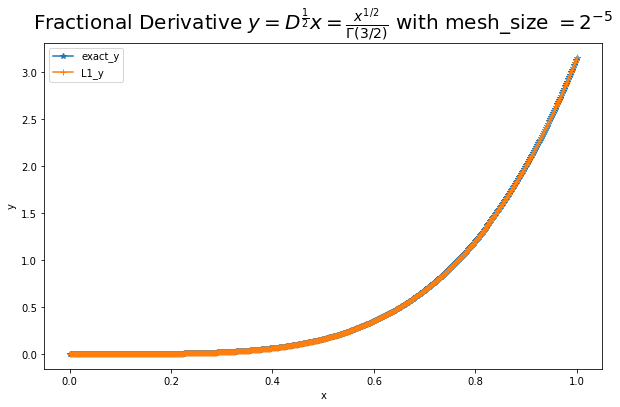

In [42]:
plt.figure(figsize=(10,6))
plt.title(r"Fractional Derivative $y=D^{\frac{1}{2}} x=\frac{x^{1/2}}{\Gamma{(3/2)}}$ with mesh_size $=2^{-5}$", fontsize='20')
plt.plot(x, exact_y,'-*')
# plt.plot(x, GL_y,'-o')
plt.plot(x, L1_y, '-+')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["exact_y", "L1_y"], loc ="upper left")
plt.show()

In [31]:
process = tqdm(total=nt) # tqdm process bar

# first iteration
u = -L * u0
history_u.append(u)
mass_list.append(sum(u0-u) * dx)

# iteration
for i in range(2,timesteps+2):
    u_prev = history_u[-1]
    u = -L * u_prev
    for k, _ in reversed(list(enumerate(history_u))):
        if k >= 1:
            u -= omega[k-1] * (history_u[k]-history_u[k-1])
        else:
            break

    history_u.append(u)
    mass_list.append(sum(u0-u)*dx)
    
    process.update(1)
    
process.close()

In [28]:
L = set_Laplacian1D(nx, dx)
L.toarray()

array([[-98.,  49.,   0.,   0.,   0.,   0.,  49.],
       [ 49., -98.,  49.,   0.,   0.,   0.,   0.],
       [  0.,  49., -98.,  49.,   0.,   0.,   0.],
       [  0.,   0.,  49., -98.,  49.,   0.,   0.],
       [  0.,   0.,   0.,  49., -98.,  49.,   0.],
       [  0.,   0.,   0.,   0.,  49., -98.,  49.],
       [ 49.,   0.,   0.,   0.,   0.,  49., -98.]])

<Figure size 432x288 with 0 Axes>

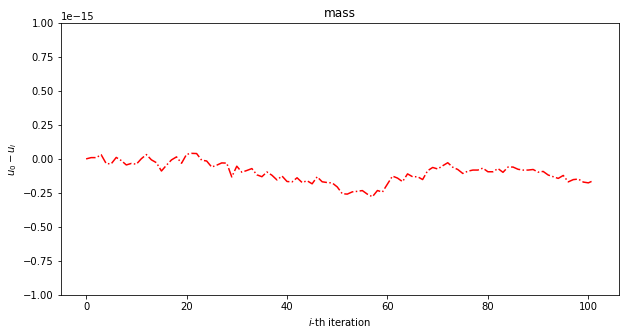

In [17]:
plt.figure(1)
plt.figure(figsize=(10,5))
plt.plot(mass_list, 'r-.')
# plt.hlines(0, xmin=0, xmax=timesteps)
plt.title("mass")
plt.ylabel("$u_0 - u_i$")
plt.xlabel("$i$-th iteration")
plt.ylim(-1e-15,1e-15)
plt.show()